In [1]:
!pip install opencv-python
!pip install mediapipe
!pip install scikit-learn

# 1. Importing libraries and defining dataset

In [2]:
# For capturing hand coordinates
import cv2
import mediapipe as mp

# For processing data
import pandas as pd
import numpy as np

#For check file
import os

In [3]:
# dataset = pd.read_csv('./Dataset/hand_dataset_1000_24.csv')
# dataset = pd.read_csv('./Dataset/hand_dataset_3000.csv')
dataset = pd.read_csv('./Dataset/hand_dataset_MAI_3000.csv')

# Show dataset first five data
dataset.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,A,0.530803,0.581163,0.413990,0.501149,0.355407,0.369223,0.345517,0.263534,0.354250,...,0.534037,0.476981,0.665000,0.338577,0.605741,0.320499,0.588447,0.400885,0.594126,0.455363
1,A,0.503664,0.616673,0.377512,0.536617,0.317852,0.408111,0.306450,0.296595,0.316670,...,0.494619,0.508490,0.635405,0.349954,0.561715,0.359349,0.546541,0.440563,0.551058,0.498263
2,A,0.267808,0.670679,0.187360,0.610215,0.141140,0.503103,0.133638,0.422246,0.138989,...,0.298920,0.586336,0.368706,0.504098,0.369881,0.461587,0.362212,0.517269,0.349507,0.565708
3,A,0.289091,0.751779,0.167962,0.654705,0.100007,0.499485,0.095107,0.371244,0.122449,...,0.294725,0.624627,0.457846,0.480413,0.393687,0.455553,0.365366,0.547497,0.356335,0.612805
4,A,0.285160,0.762803,0.161197,0.667723,0.094453,0.512100,0.090644,0.383932,0.113567,...,0.292644,0.635424,0.450271,0.489606,0.388296,0.466932,0.361084,0.560643,0.352804,0.623975


In [4]:
# Show dataset overview, should return 1000 for each alphabet (excluding y and z)
dataset['class'].value_counts()

I    2393
A    2180
M    1675
Name: class, dtype: int64

# 2. Creating Train and Test Data
- We use *train_test_split* since we don't really have test dataset.
- Normalizing dataset can be ignored, since we predict our data directly using raw handlandmark. 

In [5]:
# Defining X and Y from dataset for training and testing

X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values

In [6]:
from sklearn.model_selection import train_test_split

# We will take 33% from 1000 for our test data.
# Recommended value 80:20, 67:33, 50:50
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [7]:
#Normalize / Standarize dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 3. Creating classifier model for our alphabet recognition.
- *n_neighbors* can be adjusted as we provide graph for mean errors for each *n_neighbors*

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# 4. Calculate model accuracy

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       724
           I       0.99      1.00      1.00       799
           M       0.99      0.98      0.99       539

    accuracy                           0.99      2062
   macro avg       0.99      0.99      0.99      2062
weighted avg       0.99      0.99      0.99      2062

0.991270611057226


# 5. Show graph for adjusting number of *n_neighbors*

In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

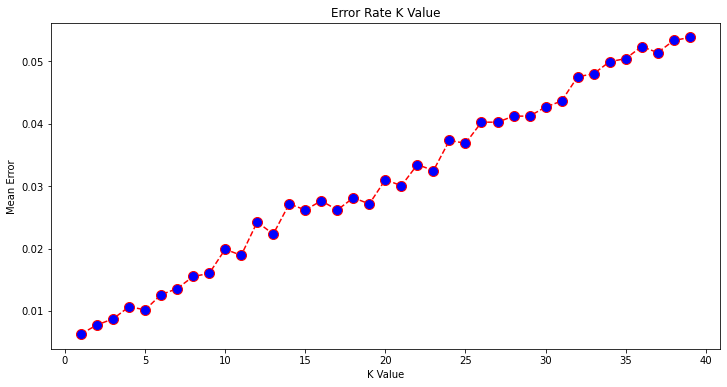

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# 6. Intialize Mediapipe Hands for alphabet recognition.

In [16]:
# Initialize mediapipe hand

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# init Check Var MAI
M = False
A = False
I = False

In [17]:
# Count File In Folder
def countFile(Ipath):
    initial_count = 0
    for path in os.listdir(Ipath):
        if os.path.isfile(os.path.join(Ipath, path)):
            initial_count += 1
    return initial_count
# Create Function to Detect complete label "M","A","I"
def isComplete():
    if(M == True and A == True and I == True):
        return True
    else:
        return False
    print("M : "+str(M)+" A : "+str(A)+" I : "+str(I))
def checkAlpha(alph):
    global M
    global A
    global I
    if(str(alph) == "M"):
        M = True
    if(str(alph) == "A"):
        A = True
    if(str(alph) == "I"):
        I = True
def DisplayCheckAlpha():
    global M
    global A
    global I
    result = "_|_|_"
    arr = result.split("|");
    if(M==True):
        arr[0]="M"
    if(A==True):
        arr[1]="A"
    if(I==True):
        arr[2]="I"
    print("M : "+str(M)+" A : "+str(A)+" I : "+str(I))
    return arr[0]+arr[1]+arr[2]
# Write detect file
def writeFile(iAlpha,img):
    BasePath = "./archive/ceremony/"+iAlpha
    isExist = os.path.exists(BasePath)
    if not isExist:
        os.makedirs(BasePath)
    cv2.imwrite(os.path.join(BasePath, f'{countFile(BasePath):04d}' +'.jpg'), img)

In [19]:
# Initialize mediapipe hand capture webcam
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    max_num_hands = 1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        # Get status box
        cv2.rectangle(image, (0,0), (200, 70), (245, 90, 16), -1)
        cv2.putText(image, DisplayCheckAlpha(), (20,25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coords = hand_landmarks.landmark
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                coords = list(np.array([[landmark.x, landmark.y] for landmark in coords]).flatten())
                coords = scaler.transform([coords])
                
                # Alternative for dataset using z coordinates.
                # Z coordinates is not recommended, since you need to adjust your distance from camera.
#                 coords = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in coords]).flatten())
                
                predicted = classifier.predict(coords)

            
            # print(predicted[0])
            # Display Class
            cv2.putText(image, "Found : "+str(predicted[0])
                        , (20,55), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            if(len(predicted) > 0):
                # writeFile(predicted[0],image)
                checkAlpha(predicted[0]);
        cv2.imshow('Hand Tracking', image)
        #if(isComplete() == True):
        #    break
        # Press esc to close webcam
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()


M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False A : False I : False
M : False 

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M

M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M : True A : True I : True
M